In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# the supplied CSV data file is in the directory
footprint= pd.read_csv('countries.csv')

In [3]:
#Calling the info method to see a summary of the data
footprint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         188 non-null    object 
 1   Region                          188 non-null    object 
 2   Population (millions)           188 non-null    float64
 3   HDI                             172 non-null    float64
 4   GDP per Capita                  173 non-null    object 
 5   Cropland Footprint              173 non-null    float64
 6   Grazing Footprint               173 non-null    float64
 7   Forest Footprint                173 non-null    float64
 8   Carbon Footprint                173 non-null    float64
 9   Fish Footprint                  173 non-null    float64
 10  Total Ecological Footprint      188 non-null    float64
 11  Cropland                        173 non-null    float64
 12  Grazing Land                    173 

In [4]:
footprint['Country'].value_counts()

Country
Afghanistan    1
Oman           1
Nauru          1
Nepal          1
Netherlands    1
              ..
Gabon          1
Gambia         1
Georgia        1
Germany        1
Zimbabwe       1
Name: count, Length: 188, dtype: int64

In [9]:
# Drop rows with missing values in required columns
footprint_clean = footprint.dropna(subset=['Total Ecological Footprint', 'Total Biocapacity', 'Population (millions)', 'Earths Required'])

# Calculate population-weighted averages
total_population = footprint_clean['Population (millions)'].sum()

weighted_ef = (footprint_clean['Total Ecological Footprint'] * footprint_clean['Population (millions)']).sum() / total_population
weighted_bio = (footprint_clean['Total Biocapacity'] * footprint_clean['Population (millions)']).sum() / total_population
weighted_earths = (footprint_clean['Earths Required'] * footprint_clean['Population (millions)']).sum() / total_population

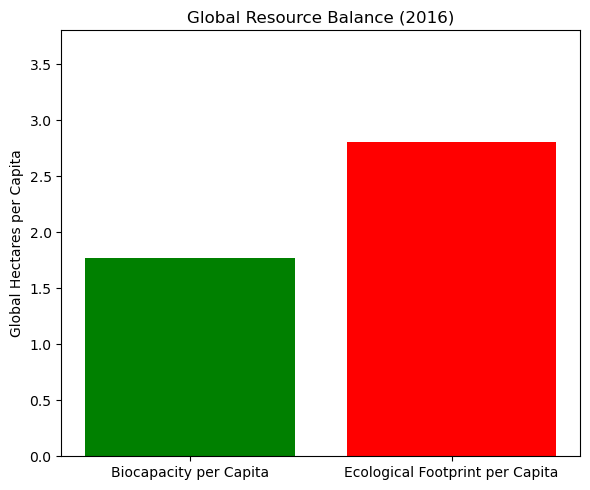

In [11]:
# Create the bar chart
plt.figure(figsize=(6,5))
plt.bar(['Biocapacity per Capita', 'Ecological Footprint per Capita'], 
        [weighted_bio, weighted_ef], 
        color=['green', 'red'])

# Styling
plt.title("Global Resource Balance (2016)")
plt.ylabel("Global Hectares per Capita")
plt.ylim(0, max(weighted_ef, weighted_bio) + 1)
plt.grid(False)
plt.tight_layout()
plt.show()

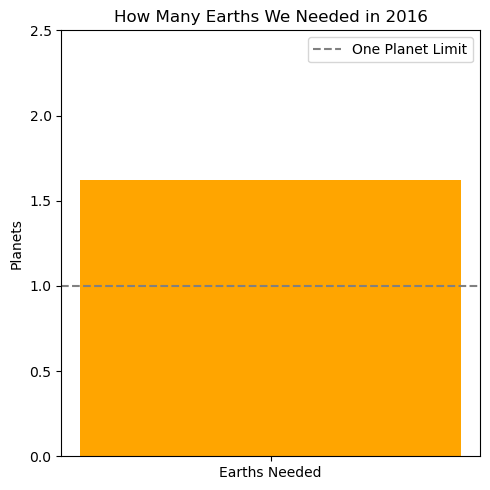

In [13]:
plt.figure(figsize=(5,5))
plt.bar(['Earths Needed'], [weighted_earths], color='orange')
plt.ylim(0, 2.5)
plt.axhline(y=1, color='gray', linestyle='--', label='One Planet Limit')
plt.title("How Many Earths We Needed in 2016")
plt.ylabel("Planets")
plt.legend()
plt.tight_layout()
plt.show()

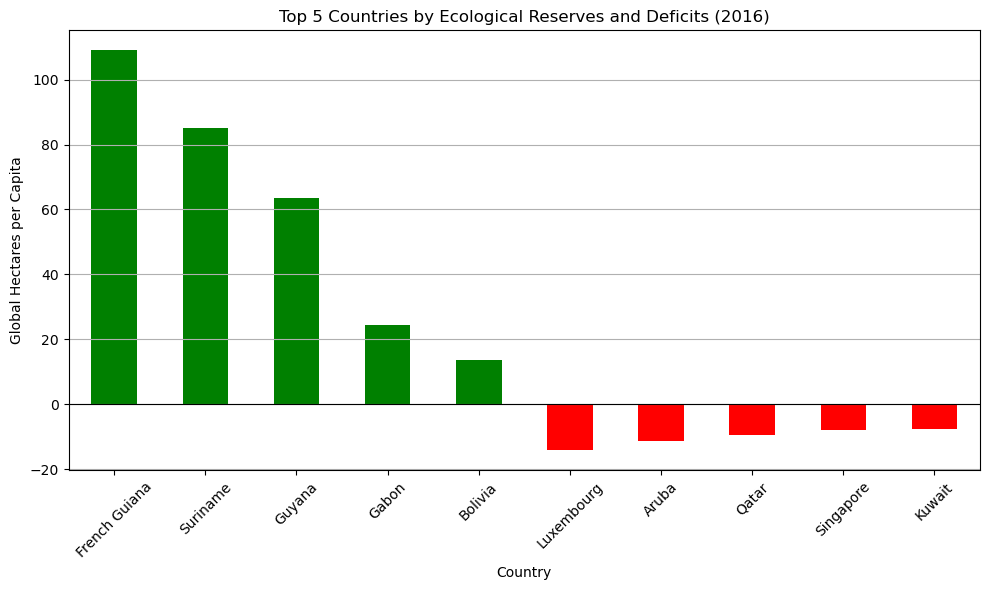

In [15]:
# Calculate reserve or deficit
footprint_clean['Reserve/Deficit'] = footprint_clean['Total Biocapacity'] - footprint_clean['Total Ecological Footprint']

# Top 5 with largest reserves (positive values)
top_reserves = footprint_clean.sort_values('Reserve/Deficit', ascending=False).head(5)

# Top 5 with largest deficits (negative values)
top_deficits = footprint_clean.sort_values('Reserve/Deficit').head(5)

# Combine for plotting
top_combined = pd.concat([top_reserves, top_deficits])
top_combined = top_combined[['Country', 'Reserve/Deficit']].set_index('Country')

# Plotting
plt.figure(figsize=(10,6))
top_combined['Reserve/Deficit'].plot(kind='bar', color=['green' if x > 0 else 'red' for x in top_combined['Reserve/Deficit']])
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Top 5 Countries by Ecological Reserves and Deficits (2016)")
plt.ylabel("Global Hectares per Capita")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U9'), dtype('float64')) -> None

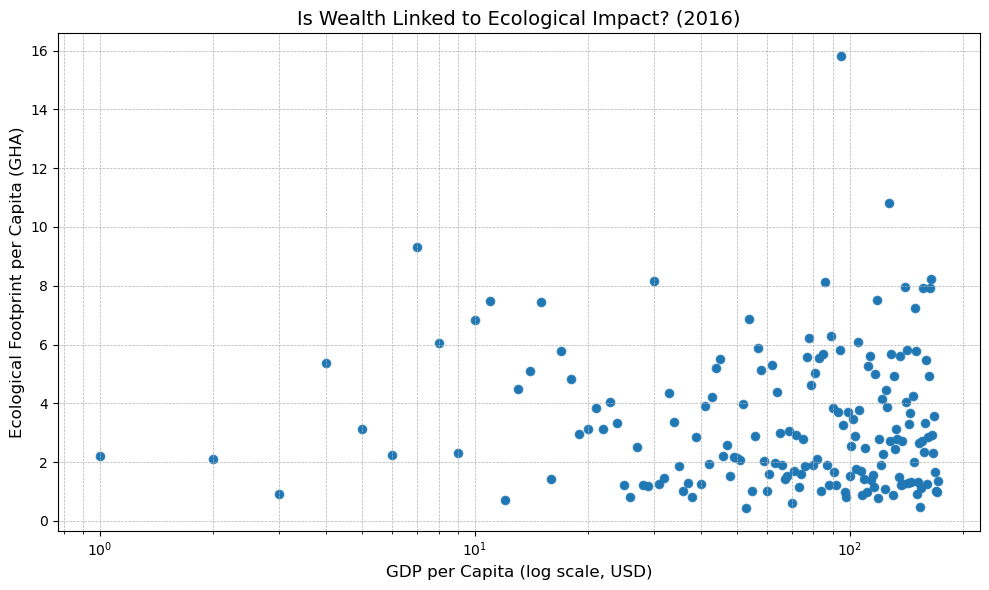

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=footprint, x='GDP per Capita', y='Total Ecological Footprint')

plt.xscale('log')
plt.title("Is Wealth Linked to Ecological Impact? (2016)", fontsize=14)
plt.xlabel("GDP per Capita (log scale, USD)", fontsize=12)
plt.ylabel("Ecological Footprint per Capita (GHA)", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
sns.regplot(data=footprint, x='GDP per Capita', y='Total Ecological Footprint', scatter=True, logx=True, line_kws={"color": "black"})
sns.scatterplot(data=footprint, x='GDP per Capita', y='Total Ecological Footprint', hue='Region', palette='Set2')

highlight = ['United States', 'India', 'Finland', 'United Arab Emirates']

for i, row in footprint.iterrows():
    if row['Country'] in highlight:
        plt.text(row['GDP per Capita (USD)'], row['Total Ecological Footprint'], row['Country'],
                 fontsize=8, ha='right', va='bottom')
plt.show()


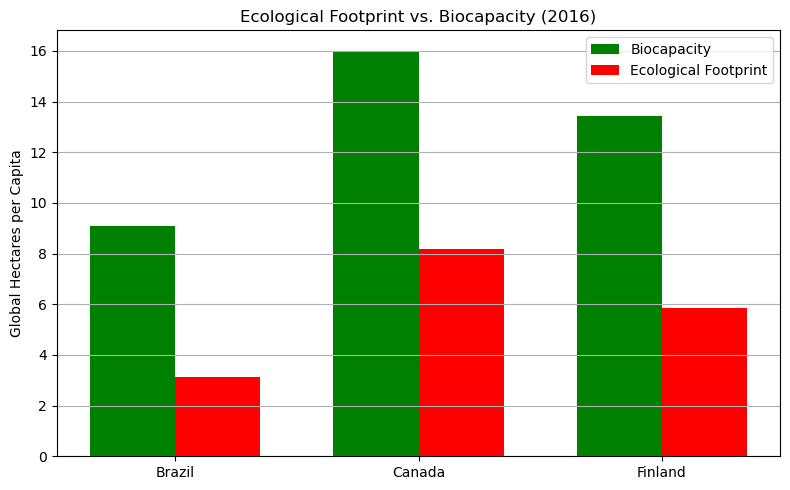

In [19]:
# Choose a few countries with large ecological reserves
selected_countries = ['Finland', 'Canada', 'Brazil']
subset = footprint_clean[footprint_clean['Country'].isin(selected_countries)].copy()

# Create a grouped bar chart
bar_width = 0.35
x = range(len(subset))

# Plot
plt.figure(figsize=(8,5))
plt.bar(x, subset['Total Biocapacity'], width=bar_width, label='Biocapacity', color='green')
plt.bar([p + bar_width for p in x], subset['Total Ecological Footprint'], width=bar_width, label='Ecological Footprint', color='red')

# X-axis labels and styling
plt.xticks([p + bar_width/2 for p in x], subset['Country'])
plt.title("Ecological Footprint vs. Biocapacity (2016)")
plt.ylabel("Global Hectares per Capita")
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()
